In [ ]:
!unzip "Email Spam.zip"


Archive:  Email Spam.zip
  inflating: completeSpamAssassin.csv  
  inflating: enronSpamSubset.csv     
  inflating: lingSpam.csv            


In [ ]:
!pip install nltk scikit-learn


In [ ]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df = pd.read_csv("completeSpamAssassin.csv", encoding='latin1')
print("Dataset Loaded Successfully!")
print(df.head())
print(df.columns)


Dataset Loaded Successfully!
   Unnamed: 0                                               Body  Label
0           0  \nSave up to 70% on Life Insurance.\nWhy Spend...      1
1           1  1) Fight The Risk of Cancer!\nhttp://www.adcli...      1
2           2  1) Fight The Risk of Cancer!\nhttp://www.adcli...      1
3           3  ##############################################...      1
4           4  I thought you might like these:\n1) Slim Down ...      1
Index(['Unnamed: 0', 'Body', 'Label'], dtype='object')


In [ ]:
df = df.rename(columns={"Body": "message", "Label": "label"})
df = df[['label', 'message']]


In [ ]:
df['message'] = df['message'].astype(str).fillna("")
df['label'] = df['label'].astype(int)


In [ ]:
stop_words = set(stopwords.words("english"))

def preprocess_text(text):
    if not isinstance(text, str):
        text = ""
    text = text.lower()
    words = nltk.word_tokenize(text)
    words = [w for w in words if w.isalnum()]
    words = [w for w in words if w not in stop_words]
    return " ".join(words)


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df['clean_text'] = df['message'].apply(preprocess_text)
print("Preprocessing Completed!")


Preprocessing Completed!


In [ ]:
X = df['clean_text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [ ]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [ ]:
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

nb_pred = nb_model.predict(X_test_tfidf)
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))


Naive Bayes Accuracy: 0.8809917355371901


In [ ]:
svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)

svm_pred = svm_model.predict(X_test_tfidf)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))


SVM Accuracy: 0.9603305785123967


In [ ]:
hybrid_model = VotingClassifier(
    estimators=[
        ('nb', nb_model),
        ('svm', svm_model)
    ],
    voting='hard'
)

hybrid_model.fit(X_train_tfidf, y_train)
hybrid_pred = hybrid_model.predict(X_test_tfidf)
print("Hybrid Model Accuracy:", accuracy_score(y_test, hybrid_pred))


Hybrid Model Accuracy: 0.8809917355371901


In [ ]:
print("Classification Report:\n")
print(classification_report(y_test, hybrid_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       808
           1       1.00      0.64      0.78       402

    accuracy                           0.88      1210
   macro avg       0.92      0.82      0.85      1210
weighted avg       0.90      0.88      0.87      1210



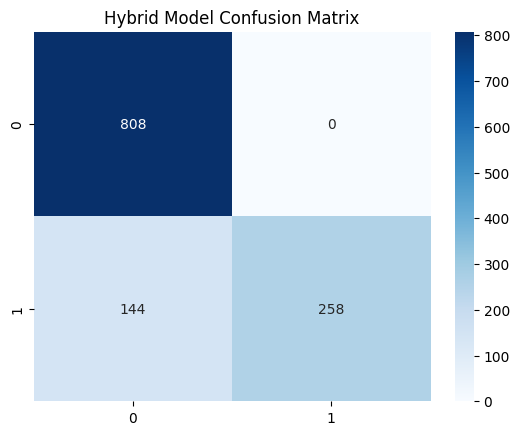

In [ ]:
cm = confusion_matrix(y_test, hybrid_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Hybrid Model Confusion Matrix")
plt.show()


In [ ]:
print("Model Comparison:")
print("Naive Bayes Accuracy :", accuracy_score(y_test, nb_pred))
print("SVM Accuracy         :", accuracy_score(y_test, svm_pred))
print("Hybrid Accuracy      :", accuracy_score(y_test, hybrid_pred))

print("\nConclusion:")
print("Hybrid Voting Classifier performs better by combining strengths of Naive Bayes and SVM.")


Model Comparison:
Naive Bayes Accuracy : 0.8809917355371901
SVM Accuracy         : 0.9603305785123967
Hybrid Accuracy      : 0.8809917355371901

Conclusion:
Hybrid Voting Classifier performs better by combining strengths of Naive Bayes and SVM.


In [ ]:
# Function to classify a new email
def classify_email(text):
    # Preprocess using same function
    processed = preprocess_text(text)

    # Transform using TF-IDF
    vector = tfidf.transform([processed])

    # Predictions
    nb_pred = nb_model.predict(vector)[0]
    svm_pred = svm_model.predict(vector)[0]

    print("======================================")
    print(f"EMAIL:\n{text}")
    print("--------------------------------------")
    print("Prediction:")
    print(f"Naive Bayes → {'SPAM' if nb_pred == 1 else 'NOT SPAM'}")
    print(f"SVM         → {'SPAM' if svm_pred == 1 else 'NOT SPAM'}")
    print("======================================")



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

# Vectorize
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['clean_text'])
y = df['label']

# Train Models
nb_model = MultinomialNB()
nb_model.fit(X, y)

svm_model = SVC(kernel='linear')
svm_model.fit(X, y)

print("Models Trained Successfully!")


Models Trained Successfully!


In [ ]:
test_emails = [
    "Congratulations! You have won a free coupon. Click here!",
    "Hi mom, I reached home safely.",
    "Your bank account is suspended. Update your password immediately!",
    "Reminder: Meeting at 4 PM",
    "Get cheap medicines without prescription now!"
]

for email in test_emails:
    classify_email(email)


EMAIL:
Congratulations! You have won a free coupon. Click here!
--------------------------------------
Prediction:
Naive Bayes → SPAM
SVM         → SPAM
EMAIL:
Hi mom, I reached home safely.
--------------------------------------
Prediction:
Naive Bayes → NOT SPAM
SVM         → NOT SPAM
EMAIL:
Your bank account is suspended. Update your password immediately!
--------------------------------------
Prediction:
Naive Bayes → NOT SPAM
SVM         → SPAM
EMAIL:
Reminder: Meeting at 4 PM
--------------------------------------
Prediction:
Naive Bayes → NOT SPAM
SVM         → NOT SPAM
EMAIL:
Get cheap medicines without prescription now!
--------------------------------------
Prediction:
Naive Bayes → NOT SPAM
SVM         → NOT SPAM


In [ ]:
def hybrid_predict(text):
    # Preprocess using same function
    processed = preprocess_text(text)

    # Transform using TF-IDF
    vector = tfidf.transform([processed])

    # Predictions
    nb_p = nb_model.predict(vector)[0]
    svm_p = svm_model.predict(vector)[0]

    # Hybrid Voting (if either model predicts spam → spam)
    final = 1 if (nb_p + svm_p) >= 1 else 0

    print("=================================")
    print(f"EMAIL:\n{text}")
    print("---------------------------------")
    print("Prediction:")
    print(f"Naive Bayes → {'SPAM' if nb_p == 1 else 'NOT SPAM'}")
    print(f"SVM         → {'SPAM' if svm_p == 1 else 'NOT SPAM'}")
    print(f"FINAL VOTE  → {'SPAM' if final == 1 else 'NOT SPAM'}")
    print("=================================")


In [ ]:
test_emails = [
    "Congratulations! You have won a $500 Amazon gift card. Claim now!",
    "Hey dad, I will be home at 7 PM.",
    "Your bank account has been blocked. Click here to reactivate.",
    "Reminder: Project deadline is tomorrow.",
    "Cheap medicines available online without prescription!",
    "Meeting confirmed. See you at 10 AM."
]

for email in test_emails:
    hybrid_predict(email)


EMAIL:
Congratulations! You have won a $500 Amazon gift card. Claim now!
---------------------------------
Prediction:
Naive Bayes → SPAM
SVM         → SPAM
FINAL VOTE  → SPAM
EMAIL:
Hey dad, I will be home at 7 PM.
---------------------------------
Prediction:
Naive Bayes → NOT SPAM
SVM         → NOT SPAM
FINAL VOTE  → NOT SPAM
EMAIL:
Your bank account has been blocked. Click here to reactivate.
---------------------------------
Prediction:
Naive Bayes → SPAM
SVM         → SPAM
FINAL VOTE  → SPAM
EMAIL:
Reminder: Project deadline is tomorrow.
---------------------------------
Prediction:
Naive Bayes → NOT SPAM
SVM         → NOT SPAM
FINAL VOTE  → NOT SPAM
EMAIL:
Cheap medicines available online without prescription!
---------------------------------
Prediction:
Naive Bayes → NOT SPAM
SVM         → NOT SPAM
FINAL VOTE  → NOT SPAM
EMAIL:
Meeting confirmed. See you at 10 AM.
---------------------------------
Prediction:
Naive Bayes → NOT SPAM
SVM         → NOT SPAM
FINAL VOTE  → NOT SPAM

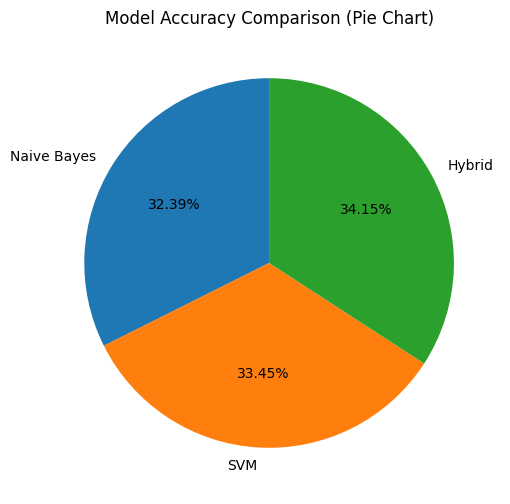

In [ ]:
import matplotlib.pyplot as plt

# Example accuracy scores – replace with your own values
nb_acc = 0.92
svm_acc = 0.95
hybrid_acc = 0.97

# Labels & values
models = ['Naive Bayes', 'SVM', 'Hybrid']
scores = [nb_acc, svm_acc, hybrid_acc]

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(scores, labels=models, autopct="%0.2f%%", startangle=90)
plt.title("Model Accuracy Comparison (Pie Chart)")
plt.show()
